/usr/local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


KeyError: 0

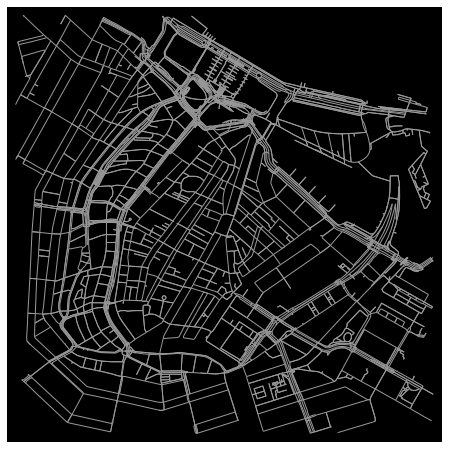

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Define the coordinates of the waypoints in Amsterdam
waypoints = [
    (52.3676, 4.9041),  # Amsterdam Centraal Station
    (52.3784, 4.9005),  # Dam Square
    (52.3655, 4.9049)   # Nieuwmarkt
]

# Get the street network for Amsterdam
place_name = "Nieuwmarkt 112, Amsterdam, Netherlands"
G = ox.graph_from_address(place_name, network_type='all', dist=1000)
route_graph = nx.Graph()
# Adjust figsize to make sure the street network is displayed in a larger plot
fig, ax = ox.plot_graph(G, figsize=(12, 12), show=False, close=False, edge_linewidth=0.5, edge_color="#999999")

# Check the bounding box of the graph to ensure it includes all your waypoints
#box = ox.utils_geo.bbox_from_point((52.3676, 4.9041), dist=1000)
#ox.plot_graph(G, bbox=bbox, ax=ax, show=False)

# Now plot the routes and waypoints on top
for i in range(len(waypoints)-1):
    start_node = ox.distance.nearest_nodes(G, waypoints[i][1], waypoints[i][0])
    end_node = ox.distance.nearest_nodes(G, waypoints[i+1][1], waypoints[i+1][0])
    route = nx.shortest_path(G, start_node, end_node, weight='length')
    ox.plot_graph_route(G, route, route_color='b', route_linewidth=2, route_alpha=0.8, ax=ax, show=False)

# Plot the waypoints
for lat, lon in waypoints:
    plt.scatter(lon, lat, c='green', s=100, zorder=5)

# Show the plot
plt.show()

